In [89]:
!pip install dtaidistance
!pip install fastdtw
!pip install dtw-python
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 7.3 MB/s eta 0:00:00a 0:00:01


In [94]:

import matplotlib.pyplot as plt
import time
from scipy.stats import pearsonr

import numpy as np


In [127]:
a = [1, 2, 5, 7, 4, 3, 6, 8, 2, 1] * 9
b = [3, 6, 1, 2, 8, 9, 3, 4, 3, 2] * 9
c = [1, 2, 5, 7, 4, 3, 6, 8, 2, 1]
d = [3, 6, 1, 2, 8, 9, 3, 4, 3, 2]

In [74]:
a_ = [(x, i) for i, x in enumerate(a)]
b_ = [(x, i) for i, x in enumerate(a)]

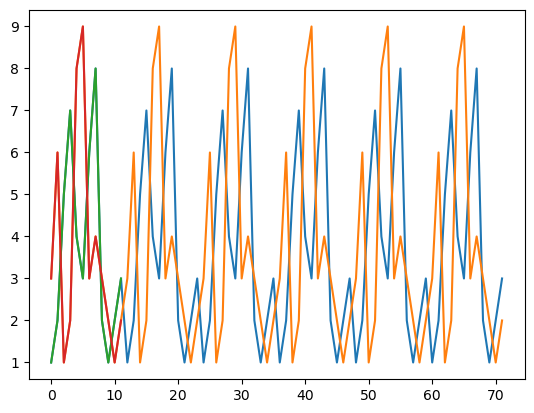

In [75]:
plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.plot(d)

In [107]:
start = time.time()
corr, p = pearsonr(a, b)
end = time.time()
print(end-start)
print(corr)

0.002947092056274414
-0.14645746914417038


In [129]:
from dtaidistance import dtw
start = time.time()
distance = dtw.distance(a, b)
end = time.time()
print(end-start)
print(distance)

0.01614999771118164
14.352700094407323


In [102]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
start = time.time()
distance, path = fastdtw(np.array(a_), np.array(b_), dist=euclidean)
end = time.time()
print(end-start)
print(distance)

0.018878936767578125
0.0


In [109]:
start = time.time()
distance, path = fastdtw(np.array(a), np.array(b), dist=lambda x, y: abs(x - y))
end = time.time()
print(end-start)
print(distance)

0.008371114730834961
101.0


In [123]:
from dtw import *
start = time.time()
result = dtw(a,b)
end = time.time()
print(end-start)
print(result.distance)

0.0023789405822753906
137.0


In [122]:
from tslearn.metrics import dtw
start = time.time()
distance = dtw(b,a)
end = time.time()
print(end-start)
print(distance)

0.0021071434020996094
14.352700094407323


Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



<Axes: xlabel='Query index', ylabel='Reference index'>

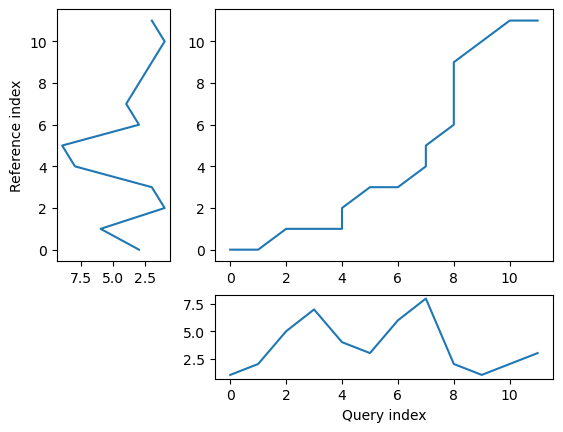

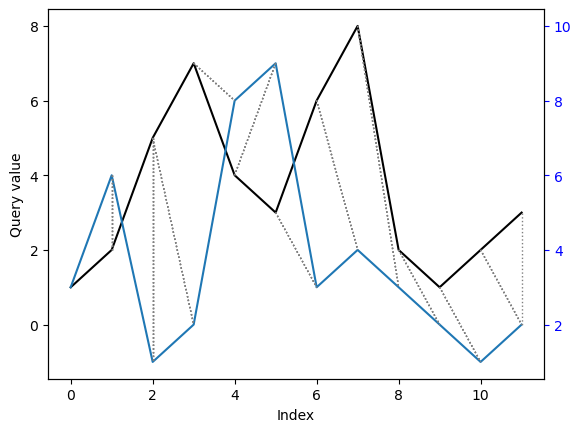

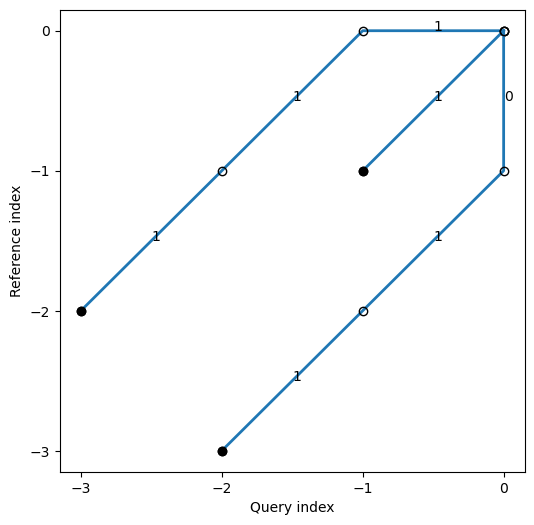

In [69]:
import numpy as np

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(c, d, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(c,d , keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

## And much more!